In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
#optional settings:
# allows us to open the file in illustrator to edit stuff.
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12


In [3]:
data = pd.read_excel("../manuscript_data.xlsx", sheet_name="covariation")
data.head(3)

,Locality,Lithology,sample,Hg,TOC,Al,Fe,V
0,Shanggang,SHA,SHA 324 C+iso,15.9,0.453358,1.009523,0.851051,13.6
1,Shanggang,SHA,SHA 325 C+iso,4.3,0.048060,NaN,NaN,NaN
2,Shanggang,SHA,SHA 506 iso,6.4,0.028917,NaN,NaN,NaN


In [4]:
sha_Hg = data[data['Locality']=='Shanggang']['Hg']
qia_Hg = data[data['Locality']=='Qiakong']['Hg']
ja_Hg = data[data['Locality']=='Jebel Aweri']['Hg']
wm_Hg = data[data['Locality']=='Wadi Musjah']['Hg']

sha_TOC = data[data['Locality']=='Shanggang']['TOC']
qia_TOC = data[data['Locality']=='Qiakong']['TOC']
ja_TOC = data[data['Locality']=='Jebel Aweri']['TOC']
wm_TOC = data[data['Locality']=='Wadi Musjah']['TOC']

sha_Al = data[data['Locality']=='Shanggang']['Al']
qia_Al = data[data['Locality']=='Qiakong']['Al']
ja_Al = data[data['Locality']=='Jebel Aweri']['Al']
wm_Al = data[data['Locality']=='Wadi Musjah']['Al']

sha_Fe = data[data['Locality']=='Shanggang']['Fe']
qia_Fe = data[data['Locality']=='Qiakong']['Fe']
ja_Fe = data[data['Locality']=='Jebel Aweri']['Fe']
wm_Fe = data[data['Locality']=='Wadi Musjah']['Fe']

sha_V = data[data['Locality']=='Shanggang']['V']
qia_V = data[data['Locality']=='Qiakong']['V']

In [5]:
y=[sha_Hg, qia_Hg, ja_Hg, wm_Hg]
x1=[sha_TOC, qia_TOC, ja_TOC, wm_TOC]
x2=[sha_Al, qia_Al, ja_Al, wm_Al]
x3 = [sha_Fe, qia_Fe, ja_Fe, wm_Fe]
x4 = [sha_V, qia_V]

In [6]:
"""This function takes 2 inputs, x and y, and returns the corresponding rho and p values
calculated for the spearmans rank correlation function. x and y are lists of data for which this calculation is needed."""

def spearman(x, y):
    from scipy.stats import spearmanr
    out=[]
    for i in range(len(x)):
        rho, p =spearmanr(x[i], y[i], nan_policy='omit')
        result = rho, p
        out.append(result)
    df = pd.DataFrame(out, columns = ['rho', 'p'])
    return df

spearman(x1,y)

,rho,p
0,0.490468,0.000052
1,0.571443,0.000095
2,0.172519,0.493629
3,0.189394,0.482355


In [7]:
x_variable = [x1, x2, x3, x4]

for i in range(len(x_variable)):
    count=0
    result = spearman(x_variable[i], y)
    # result.to_excel(f'../output{count}.xlsx')
    count+=1
    # print(result)
    

In [8]:
Hg = data["Hg"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


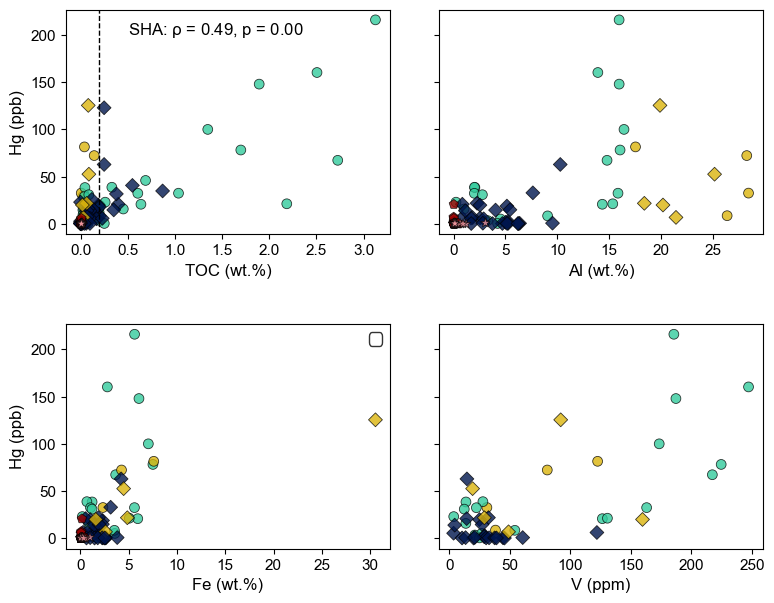

In [9]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2,
                                figsize=(9, 7), sharey=True)
colors = ['#33cb9c', '#DBB40C', '#00164e', '#DBB40C', '#9b0000', '#ef959d']
markers = ['o','o', 'D','D', 'p','*']
fig.subplots_adjust(hspace=0.4, wspace=0.15)

#define the variables needed to iterably make the figures.
subs = ['TOC', 'Al', 'Fe', 'V']
ax = [ax0, ax1, ax2, ax3]
xlabels = [ "TOC (wt.%)", "Al (wt.%)", "Fe (wt.%)","V (ppm)"]
text = r'$\rho$'
# make the subplots using a for loop.
for ix, sub in enumerate(subs):
    sns.scatterplot(data=data, x=data[sub], y=Hg, ax=ax[ix],
                    color='black', edgecolor='black', legend=False,
                    s=50, hue='Lithology', palette=colors, alpha=0.8,
                    style='Lithology', markers=markers,
                    )
    ax[ix].tick_params(labelsize=11)
    ax[ix].set_xlabel(xlabels[ix], fontsize=12)
    ax[ix].set_ylabel("Hg (ppb)", fontsize=12)
ax0.axvline(x=0.2, linestyle='--', color='black', linewidth=1)
ax0.annotate(f'SHA: {text} = 0.49, p = 0.00',(0.5,200))
ax2.legend(loc='upper right', edgecolor='black')
# plt.savefig("../plots/covariation.pdf")


In [10]:
df = pd.read_excel('../manuscript_data.xlsx', sheet_name="Nd_Sr")
df.head(2)

,Locality,sample,Sr,Sr_2se,Nd(t),Nd_2se,Nd143_144
0,Qiakong,Q130,0.708199,0.000057,-7.155361,0.133041,0.512169
1,Qiakong,Q133,0.708341,0.000026,-6.358442,0.076262,0.512210


In [11]:
markers2 = ['D', 'p', '*']
Sr=df.Sr
Nd=df["Nd(t)"]


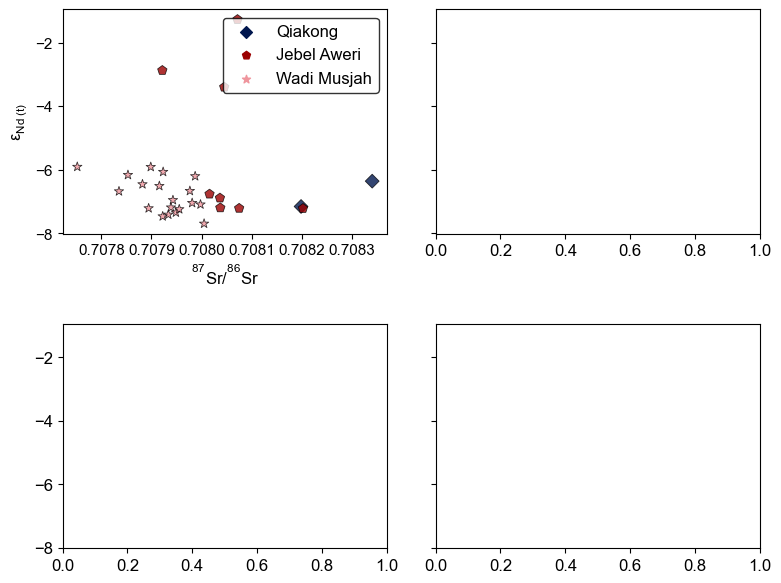

In [12]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(9, 7), sharey=True)
fig.subplots_adjust(hspace=0.4, wspace=0.15)
sns.scatterplot(data=df, x=Sr, y=Nd, ax=ax0,
                    color='black', edgecolor='black', legend=True,
                    s=50, hue='Locality', palette=[colors[2], colors[4], colors[5]], alpha=0.8,
                    style='Locality', markers=markers2,
                    )
ax0.tick_params(labelsize=11)
ax0.set_xlabel(r"$^{87}Sr/^{86}Sr$", fontsize=12)
ax0.set_ylabel(r"$\epsilon_{Nd\;(t)}$", fontsize=12)
ax0.legend(loc='upper right', edgecolor='black')